# Predicting Stock Market Information

Initially inspired from the random project listed [here](https://www.geeksforgeeks.org/stock-price-prediction-using-machine-learning-in-python/).

Downloading some sample data via the `yfinance` package. A brief tutorial is available [here](https://blog.quantinsti.com/stock-market-data-analysis-python/#:~:text=You%20can%20use%20pandas_datareader%20or,Jupyter%20Notebook%20to%20install%20yfinance).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

sns.set_theme(style="darkgrid")

In [2]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2024-10-2'

# Set the ticker
ticker = 'AMZN'

# Get the data
df = yf.download(ticker, start_date, end_date)

# Print 5 rows
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-25,193.750000,193.949997,192.160004,192.529999,192.529999,26391100
2024-09-26,194.309998,194.529999,189.539993,191.160004,191.160004,36334900
2024-09-27,190.679993,190.899994,187.339996,187.970001,187.970001,36002300
2024-09-30,187.139999,188.490005,184.649994,186.330002,186.330002,41583900
2024-10-01,184.899994,186.190002,183.449997,185.130005,185.130005,36044900


In [3]:
# Pandas dataframe
type(df)

pandas.core.frame.DataFrame

In [4]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6.226000e+03
mean,42.167989,42.658835,41.633170,42.157908,42.157908,1.193194e+08
std,56.214581,56.850458,55.509377,56.185739,56.185739,9.778368e+07
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.318500,2.374625,2.277000,2.325125,2.325125,6.300350e+07
50%,11.163250,11.300750,10.971500,11.147000,11.147000,9.731100e+07
75%,81.188126,82.067749,80.127750,81.362123,81.362123,1.443877e+08
max,200.089996,201.199997,199.050003,200.000000,200.000000,2.086584e+09


In [7]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-23',
               '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27',
               '2024-09-30', '2024-10-01'],
              dtype='datetime64[ns]', name='Date', length=6226, freq=None)

This data feels ***too*** clean to be good practice.  What do you think?  I suppose if we are practicing predicting stock prices and this fell under the "easy" category, then maybe that makes sense. Admittedly I'm disappointed in the lack of cleaning necessary (not a comment I would make if getting paid to model with this data, of course).

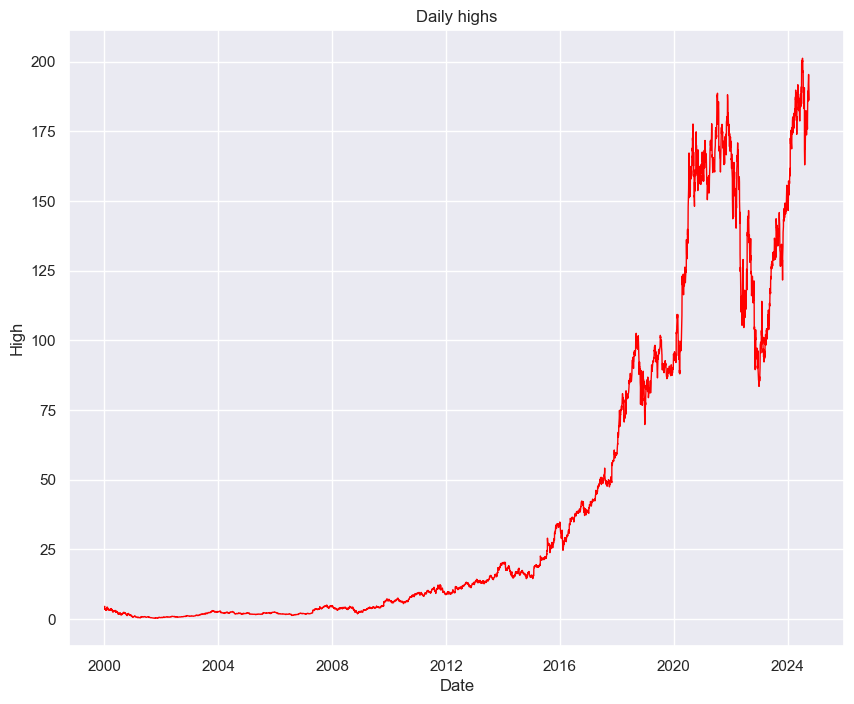

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='Date', y='High', ax=ax, color='red', linewidth='1')
ax.set_title('Daily highs');

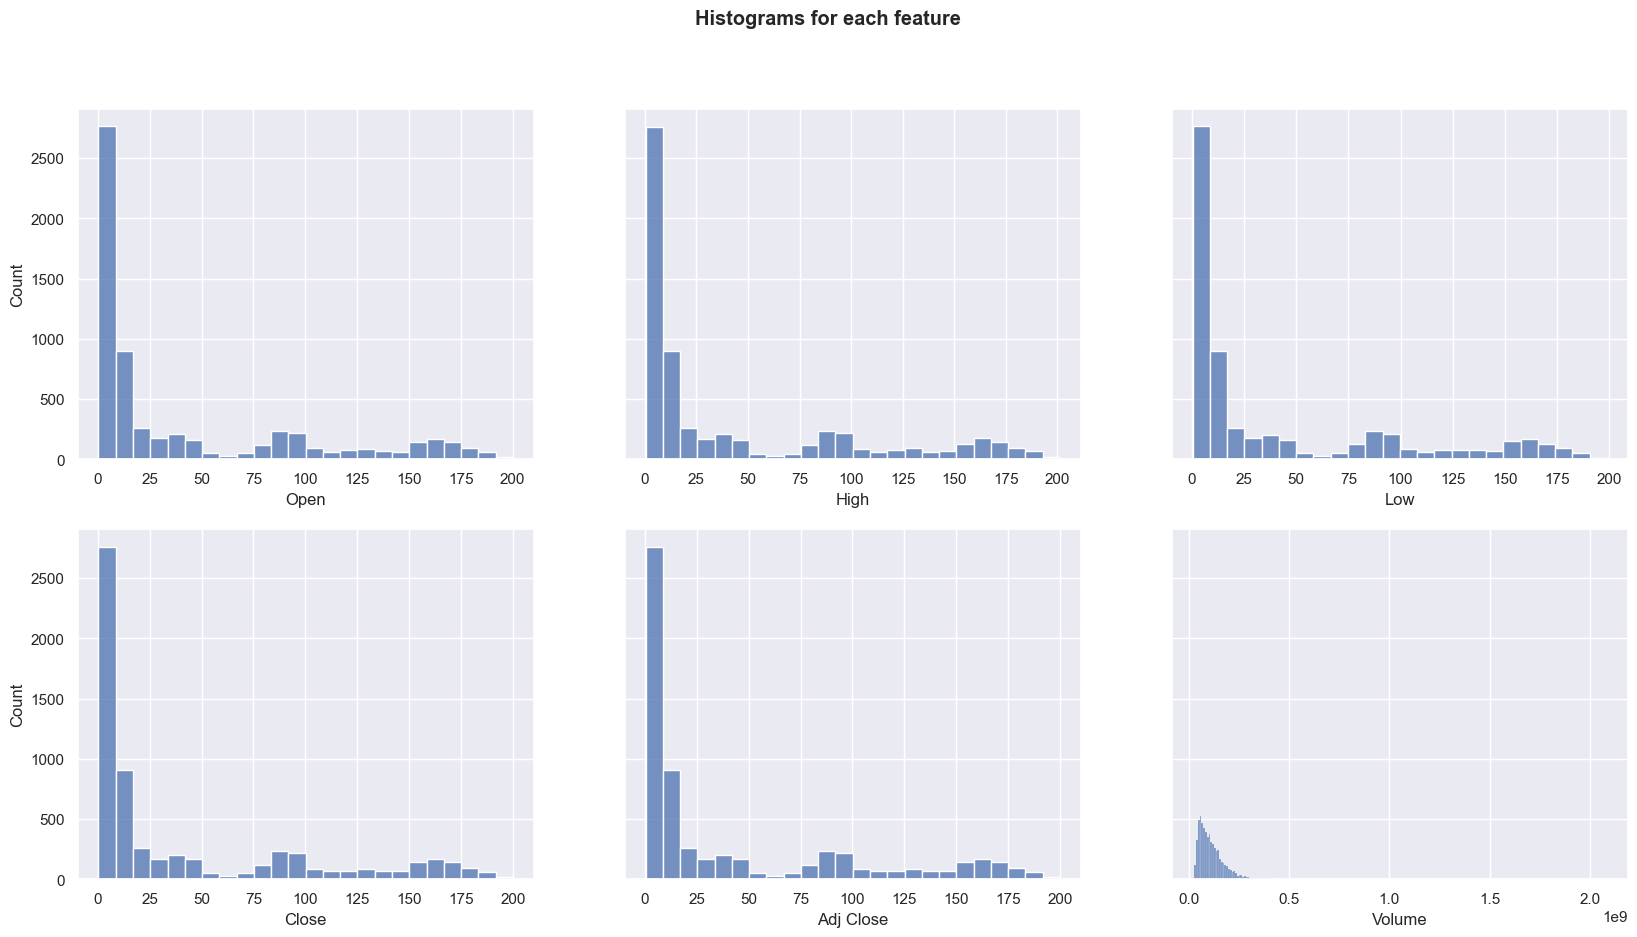

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(20,10), sharey=True)
ax = ax.ravel()
for i, col in enumerate(df.columns):
  sns.histplot(df[col], ax=ax[i])
fig.suptitle('Histograms for each feature', fontweight='bold');